In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
"""# Побудова моделі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Перетворення 2D зображень в 1D вектори
    layers.Dense(128, activation='relu'),  # Перший прихований шар
    layers.Dropout(0.2),  # Регуляризація Dropout
    layers.Dense(256, activation='relu'),  # Другий прихований шар
    layers.Dropout(0.2),  # Регуляризація Dropout
    layers.Dense(10, activation='softmax')  # Вихідний шар
])"""

In [20]:
# Побудова моделі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [21]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Навчання моделі
history = model.fit(x_train, y_train, epochs=8,
                    validation_data=(x_test, y_test), batch_size=64)


Epoch 1/8
938/938 [==============================] - 7s 5ms/step - loss: 0.5348 - accuracy: 0.8043 - val_loss: 0.3819 - val_accuracy: 0.8620
Epoch 2/8
938/938 [==============================] - 4s 5ms/step - loss: 0.3317 - accuracy: 0.8791 - val_loss: 0.3117 - val_accuracy: 0.8867
Epoch 3/8
938/938 [==============================] - 5s 5ms/step - loss: 0.2823 - accuracy: 0.8976 - val_loss: 0.2809 - val_accuracy: 0.8974
Epoch 4/8
938/938 [==============================] - 5s 5ms/step - loss: 0.2494 - accuracy: 0.9083 - val_loss: 0.2742 - val_accuracy: 0.9049
Epoch 5/8
938/938 [==============================] - 4s 5ms/step - loss: 0.2249 - accuracy: 0.9171 - val_loss: 0.2674 - val_accuracy: 0.9015
Epoch 6/8
938/938 [==============================] - 5s 5ms/step - loss: 0.2061 - accuracy: 0.9236 - val_loss: 0.2614 - val_accuracy: 0.9050
Epoch 7/8
938/938 [==============================] - 4s 5ms/step - loss: 0.1845 - accuracy: 0.9306 - val_loss: 0.2574 - val_accuracy: 0.9092
Epoch 8/8
938

In [23]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - loss: 0.2456 - accuracy: 0.9117 - 621ms/epoch - 2ms/step

Test accuracy: 0.9117


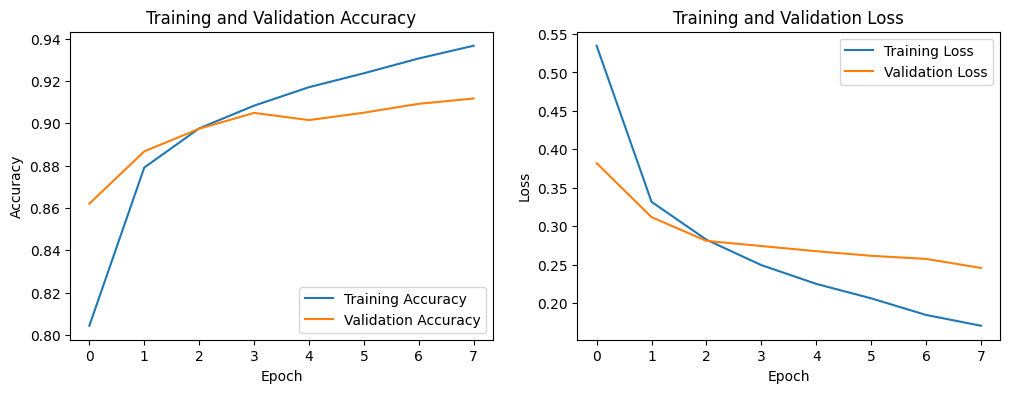

In [24]:
# Візуалізація результатів навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()